## Inversa

### Inversa manual

In [1]:
import numpy as np

def ImprimirSistema(m_coef, m_inver):
    for fila, fila_inv in zip(m_coef, m_inver):
        fila_formato = "\t".join([f"{x: 4.2f}" for x in fila])
        fila_inv_formato = "\t".join([f"{x: 4.2f}" for x in fila_inv])
        print(f"{fila_formato}|{fila_inv_formato}")

def InvGaussJordan(m_coef):
    matriz = m_coef.astype(float)
    n_filas, n_cols = matriz.shape
    inversa = np.eye(n_filas)
    
    for columna in range(n_cols):
        for fila in range(n_filas):
            if fila == columna:
                factor = 1/matriz[fila,columna]
                matriz[fila,:] = matriz[fila,:] * factor
                inversa[fila,:] = inversa[fila,:] * factor
            else:
                factor =- matriz[fila, columna] / matriz[columna,columna]
                print(f"factor de {factor} ")
                print(f"R{fila} --> {factor}*R{columna} + R{fila}") 
                matriz[fila,:] = matriz[columna,:] * factor + matriz[fila,:]
                inversa[fila,:] = inversa[columna,:] * factor + inversa[fila,:]
            ImprimirSistema(matriz, inversa)
    return inversa

In [2]:
n=5
A = np.random.randint(-20,20, size=(n,n))
print(A, "\n")

print(np.linalg.det(A), "\n")

A_inv = InvGaussJordan(A)

[[ 17  -7  -1   8 -17]
 [ 17   5   7   2  -9]
 [ -7 -17 -12  11  -4]
 [-16  -8   6  16 -19]
 [ 19  15  -8   3  11]] 

569171.9999999993 

 1.00	-0.41	-0.06	 0.47	-1.00| 0.06	 0.00	 0.00	 0.00	 0.00
 17.00	 5.00	 7.00	 2.00	-9.00| 0.00	 1.00	 0.00	 0.00	 0.00
-7.00	-17.00	-12.00	 11.00	-4.00| 0.00	 0.00	 1.00	 0.00	 0.00
-16.00	-8.00	 6.00	 16.00	-19.00| 0.00	 0.00	 0.00	 1.00	 0.00
 19.00	 15.00	-8.00	 3.00	 11.00| 0.00	 0.00	 0.00	 0.00	 1.00
factor de -17.0 
R1 --> -17.0*R0 + R1
 1.00	-0.41	-0.06	 0.47	-1.00| 0.06	 0.00	 0.00	 0.00	 0.00
 0.00	 12.00	 8.00	-6.00	 8.00|-1.00	 1.00	 0.00	 0.00	 0.00
-7.00	-17.00	-12.00	 11.00	-4.00| 0.00	 0.00	 1.00	 0.00	 0.00
-16.00	-8.00	 6.00	 16.00	-19.00| 0.00	 0.00	 0.00	 1.00	 0.00
 19.00	 15.00	-8.00	 3.00	 11.00| 0.00	 0.00	 0.00	 0.00	 1.00
factor de 7.0 
R2 --> 7.0*R0 + R2
 1.00	-0.41	-0.06	 0.47	-1.00| 0.06	 0.00	 0.00	 0.00	 0.00
 0.00	 12.00	 8.00	-6.00	 8.00|-1.00	 1.00	 0.00	 0.00	 0.00
 0.00	-19.88	-12.41	 14.29	-11.00| 0.41	 0.00	 1.

### Comprobación

In [3]:
np.matmul(A, A_inv)

array([[ 1.00000000e+00,  8.88178420e-16, -6.10622664e-16,
        -2.77555756e-17, -3.46944695e-17],
       [-2.47024623e-15,  1.00000000e+00,  1.16573418e-15,
         1.38777878e-16,  7.63278329e-17],
       [ 3.77475828e-15, -2.22044605e-15,  1.00000000e+00,
        -3.33066907e-16, -2.22044605e-16],
       [ 1.91513472e-15,  1.77635684e-15,  3.88578059e-16,
         1.00000000e+00, -2.70616862e-16],
       [-5.24580379e-15,  2.22044605e-15,  2.49800181e-15,
        -2.77555756e-17,  1.00000000e+00]])

In [4]:
np.allclose(
    np.matmul(A, A_inv),
    np.eye(n)
)

True

### Numpy implementation 

In [5]:
A_inv_2 = np.linalg.inv(A)
A_inv_2

array([[-0.03905674,  0.10103449,  0.0528241 , -0.02810047, -0.00702424],
       [ 0.115726  , -0.18987582, -0.13452173,  0.04767979,  0.05693534],
       [-0.20491872,  0.30193685,  0.13558643, -0.01864463, -0.05255353],
       [-0.14247011,  0.19176277,  0.12184015,  0.02232717,  0.01958635],
       [-0.20052286,  0.25169896,  0.15757627, -0.03612968, -0.01815971]])

In [12]:
np.allclose(
    A_inv, 
    A_inv_2
)

True

## Limites

### Infinito

In [15]:
import matplotlib.pyplot as plt

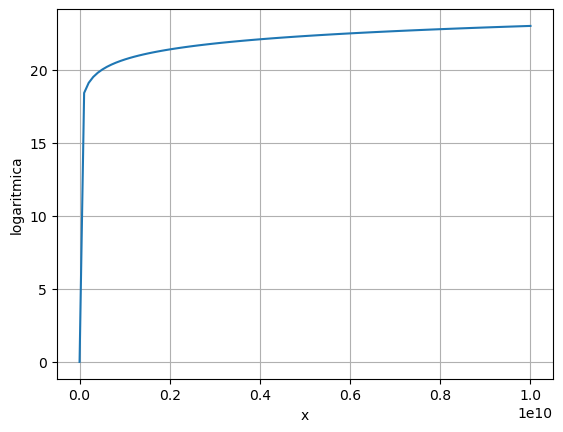

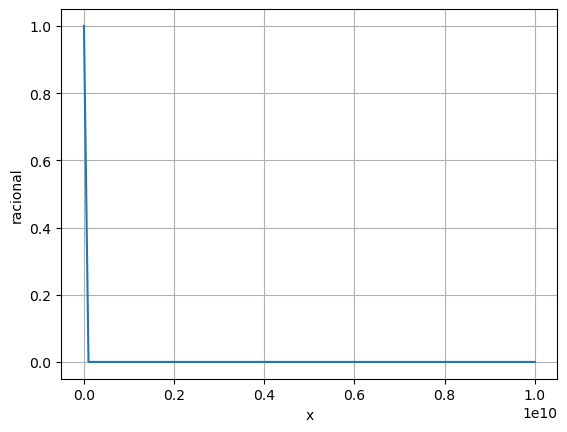

In [18]:
def logaritmica(x):
    return np.log(x) 

def racional(x):
    return x / (x ** 2)
x = np.linspace(1, 1e10, 100) # 1e50

for f in [logaritmica, racional]:
  y = f(x)

  plt.plot(x, y)
  plt.xlabel('x')
  plt.ylabel(f.__name__)
  plt.grid(True)
  plt.show()

### Cero

/tmp/ipykernel_14991/2392230523.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x)


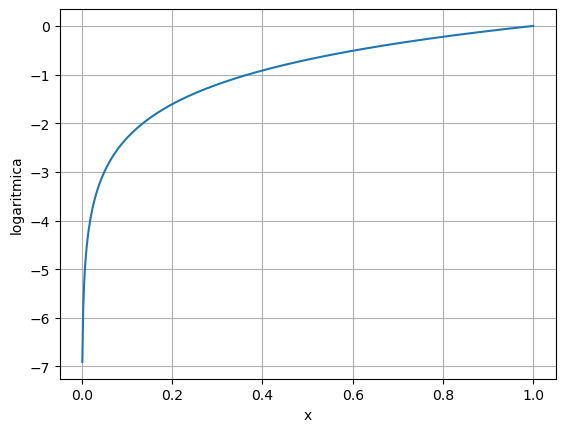

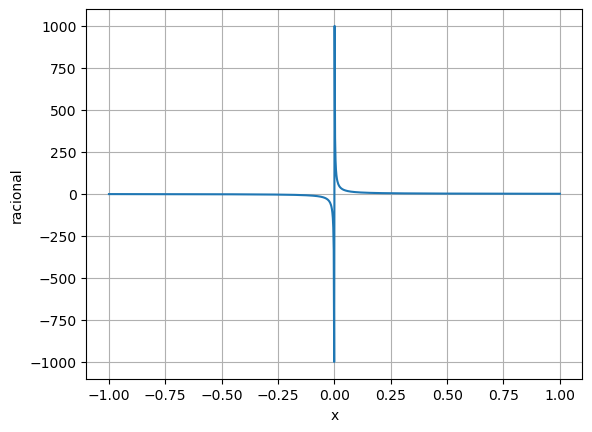

In [19]:
x = np.linspace(-1, 1, 1000)

for f in [logaritmica, racional]:
  y = f(x)

  plt.plot(x, y)
  plt.xlabel('x')
  plt.ylabel(f.__name__)
  plt.grid(True)
  plt.show()

## Derivada

In [21]:
def velocidad(x):
  return -0.13*x**2 + 6.17*x + 0.71


def GraphDer(x_points, y_points):
    for x_p,y_p in zip(x_points,y_points):
        print(f"Velocidad en minuto {x_p:.2f}: {y_p:.2f}")

    cambio_velocidad =  (y_points[1]-y_points[0] )/ ((x_points[1]-x_points[0])/60)
    print(f"Cambio de velocidad {cambio_velocidad:.2f} km/h^2")

    plt.plot(x, y, label='Velocidad')
    plt.scatter(x_points, y_points, color='red', label='instantes')
    plt.plot(x_points, y_points, label='Cambio velocidad')


    plt.xlabel('tiempo min')
    plt.ylabel('velocidad km/h')
    plt.grid(True)
    plt.legend()
    plt.show()

Velocidad en minuto 15.00: 64.01
Velocidad en minuto 21.00: 72.95
Cambio de velocidad 89.40 km/h^2


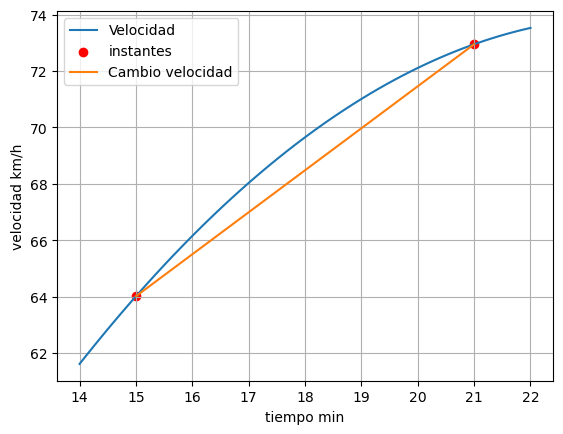

Velocidad en minuto 15.00: 64.01
Velocidad en minuto 16.00: 66.15
Cambio de velocidad 128.40 km/h^2


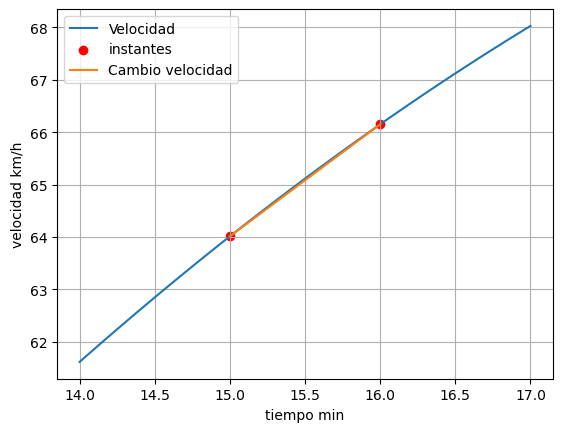

Velocidad en minuto 15.20: 64.46
Velocidad en minuto 15.70: 65.54
Cambio de velocidad 129.18 km/h^2


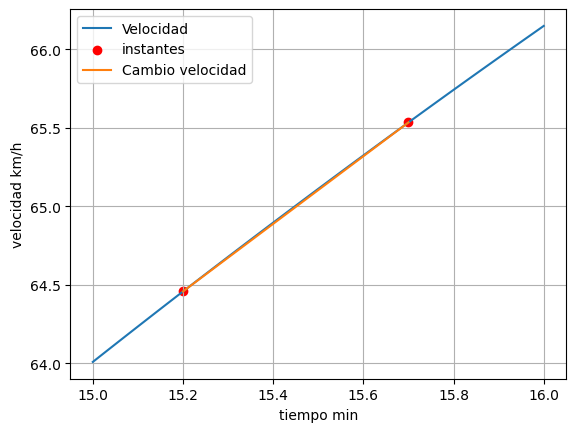

In [25]:
x = np.linspace(14, 22, 60)
y = velocidad(x)
x_points = np.array([15, 21])
y_points = velocidad(x_points)
GraphDer(x_points, y_points)

x = np.linspace(14, 17, 60)
y = velocidad(x)
x_points = np.array([15, 16])
y_points = velocidad(x_points)
GraphDer(x_points, y_points)

x = np.linspace(15, 16, 60)
y = velocidad(x)
x_points = np.array([15.2, 15.7])
y_points = velocidad(x_points)
GraphDer(x_points, y_points)

## Integral

In [34]:
def GraphInt(x_points, y_points):
    for x_p,y_p in zip(x_points,y_points):
        print(f"Velocidad en minuto {x_p:.2f}: {y_p:.2f}")

    distancia_recorrida =  y_points[0] * (x_points[1]-x_points[0]) / 60

    
    plt.plot(x, y, label='Velocidad')
    distancia_recorrida = 0
    for i in range(len(x_points)-1):
        y_areas = [y_points[i],y_points[i]]
        x_areas = x_points[i:i+2]
        distancia_recorrida +=  y_points[i] * (x_areas[1]-x_areas[0]) / 60
        plt.stackplot(x_areas, y_areas, alpha=0.5)

    print(f"Distancia recorrida {distancia_recorrida:.2f} km")
    
    plt.scatter(x_points, y_points, color='black',  label='instantes')


    plt.xlabel('tiempo min')
    plt.ylabel('velocidad km/h')
    plt.grid(True)
    plt.legend()
    plt.show()

Velocidad en minuto 15.00: 64.01
Velocidad en minuto 21.00: 72.95
Distancia recorrida 6.40 km


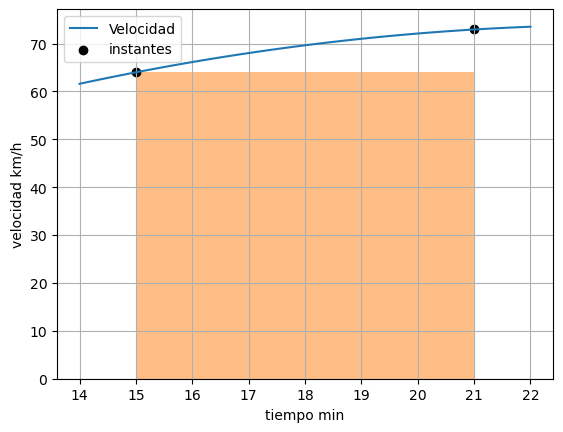

Velocidad en minuto 15.00: 64.01
Velocidad en minuto 16.00: 66.15
Velocidad en minuto 17.00: 68.03
Velocidad en minuto 18.00: 69.65
Velocidad en minuto 19.00: 71.01
Velocidad en minuto 20.00: 72.11
Velocidad en minuto 21.00: 72.95
Distancia recorrida 6.85 km


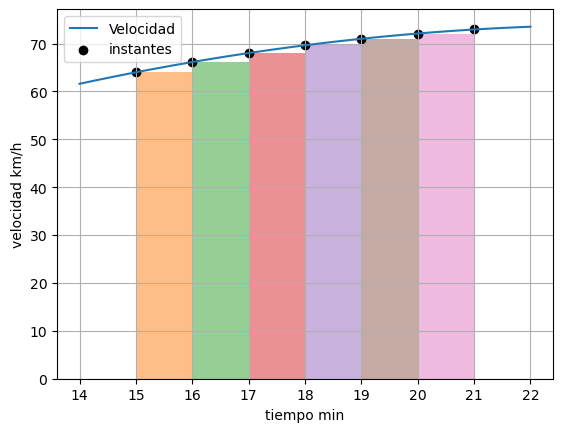

Velocidad en minuto 14.00: 61.61
Velocidad en minuto 14.17: 62.03
Velocidad en minuto 14.33: 62.44
Velocidad en minuto 14.50: 62.84
Velocidad en minuto 14.67: 63.24
Velocidad en minuto 14.83: 63.63
Velocidad en minuto 15.00: 64.01
Velocidad en minuto 15.17: 64.38
Velocidad en minuto 15.33: 64.75
Velocidad en minuto 15.50: 65.11
Velocidad en minuto 15.67: 65.47
Velocidad en minuto 15.83: 65.81
Velocidad en minuto 16.00: 66.15
Velocidad en minuto 16.17: 66.48
Velocidad en minuto 16.33: 66.81
Velocidad en minuto 16.50: 67.12
Velocidad en minuto 16.67: 67.43
Velocidad en minuto 16.83: 67.73
Velocidad en minuto 17.00: 68.03
Velocidad en minuto 17.17: 68.32
Velocidad en minuto 17.33: 68.60
Velocidad en minuto 17.50: 68.87
Velocidad en minuto 17.67: 69.14
Velocidad en minuto 17.83: 69.40
Velocidad en minuto 18.00: 69.65
Velocidad en minuto 18.17: 69.89
Velocidad en minuto 18.33: 70.13
Velocidad en minuto 18.50: 70.36
Velocidad en minuto 18.67: 70.59
Velocidad en minuto 18.83: 70.80
Velocidad 

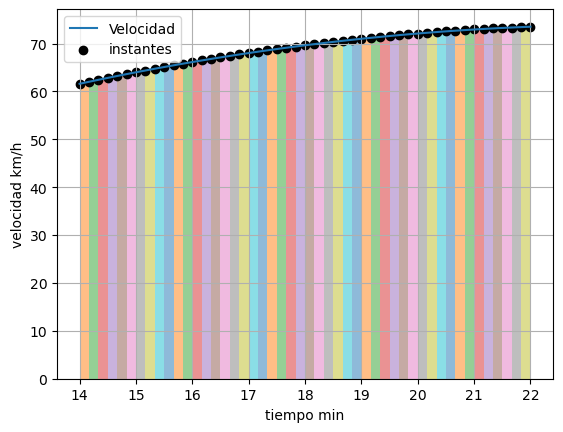

In [35]:
x = np.linspace(14, 22, 60)
y = velocidad(x)
x_points = np.array([15, 21])
y_points = velocidad(x_points)
GraphInt(x_points, y_points)

x = np.linspace(14, 22, 60,dtype=float)
y = velocidad(x)
x_points = np.linspace(15, 21, 21-15+1)
y_points = velocidad(x_points)
GraphInt(x_points, y_points)

x = np.linspace(14, 22, 60)
y = velocidad(x)
x_points = np.linspace(14, 22, 6*(22-14)+1)
y_points = velocidad(x_points)
GraphInt(x_points, y_points)

## Calc Multivariable

In [ ]:
!pip install plotly


In [37]:
import plotly.graph_objects as go

In [39]:
def GraphSurface(x, y, z, title, zaxis_title = 'f(x, y)'):
    '''
    Descrip: Función para gráficar valores de x y z con cierto titulo y nombre de eje z
    Input:
        x (List): Conjunto de valores independientes
        y (List): Conjunto de valores independientes
        z (List): Conjunto de valores dependientes
        title (String): Titulo de gráfica
        zaxis_title (String | Default: 'f(x, y)') : Nombre de eje z de gráfica 
    Output:
        None
    '''
    fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title= zaxis_title
        )
    )

    fig.show()
    

In [40]:
f4_x_coef = np.array([1,0,0,0]);
f4_y_coef = np.array([-3,0,0]);

x_4 = np.linspace(-10, 10, 100)
y_4 = np.linspace(-10, 10, 100)

X_4, Y_4 = np.meshgrid(x_4, y_4)

Z_4 = np.polyval(f4_x_coef, X_4) + np.polyval(f4_y_coef, Y_4)

GraphSurface(X_4, Y_4, Z_4, '$f(x, y) = x^3 - 3y^2$', 'f(x, y)')

# Derivadas

In [41]:
def GraphFunc(x, y, title, step=False):
    '''
        Descrip: Función para gráficar valores de x y y con cierto titulo
        Input:
            x (List): Conjunto de valores independientes
            y (List): Conjunto de valores dependientes
            title (String): Titulo de gráfica
            step (Boolean | Default: False): Si gráfica debe ser línea o escalonada
        Output:
            None
    '''
    plt.clf()
    plt.plot(x, y) if step == False else plt.step(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.grid(True)
    plt.show()

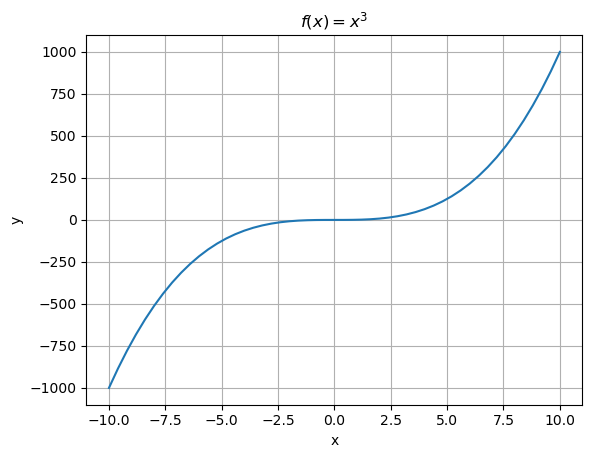

In [42]:
f1_coeficientes = np.array([1,0,0,0])

x_1 = np.linspace(-10,10, 51)
y_1 = np.polyval(f1_coeficientes, x_1)

GraphFunc(x_1, y_1, "$f(x) = x^3$")

## Primera derivada

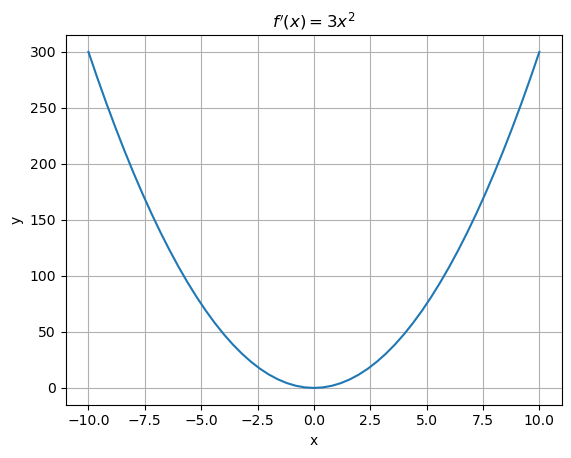

In [44]:
f1_coef_der_1 = np.polyder(f1_coeficientes)
f1_coef_der_1

y_1_prima = np.polyval(f1_coef_der_1, x_1)

GraphFunc(x_1, y_1_prima, "$f'(x) = 3x^2$")

## Diferencias finitas (Primera derivada)

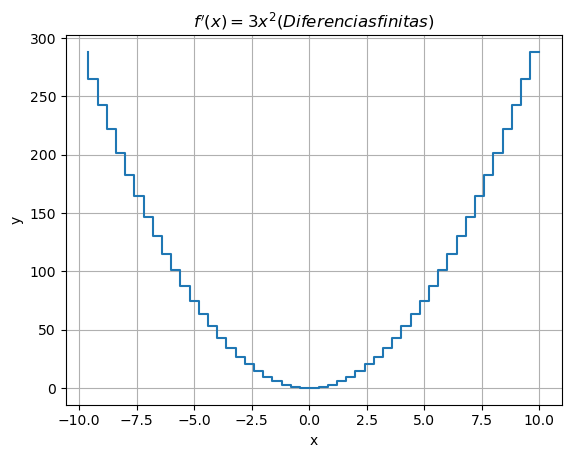

In [45]:
y_1_dif_finita = np.diff(y_1)/np.diff(x_1)

GraphFunc(x_1[1:], y_1_dif_finita, "$f'(x) = 3x^2 (Diferencias finitas)$", True)

## Segunda derivada

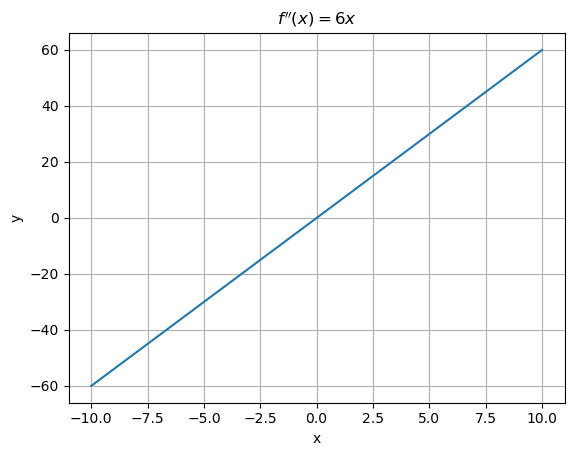

In [46]:
f1_coef_der_2 = np.polyder(f1_coef_der_1)
f1_coef_der_2

y_1_prima_prima = np.polyval(f1_coef_der_2, x_1)

GraphFunc(x_1, y_1_prima_prima, "$f''(x) = 6x$")

## Segunda derivada diferencias finitas

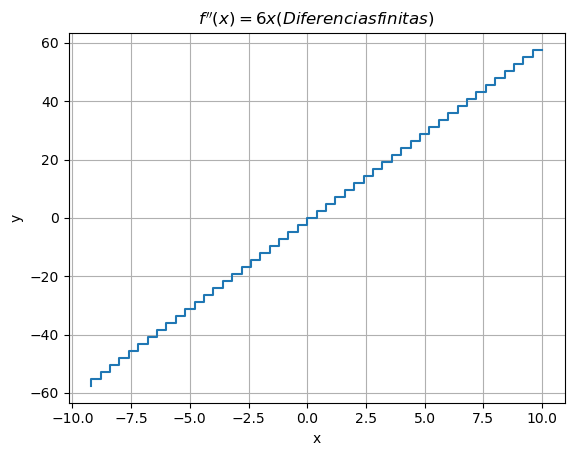

In [47]:
y_1_dif_finita_o2 = np.diff(y_1_dif_finita)/(np.diff(x_1[1:]))

GraphFunc(x_1[2:], y_1_dif_finita_o2, "$f''(x) = 6x (Diferencias finitas)$", True)

## Derivadas multivariable

In [48]:
def GraphSurface(x, y, z, title, zaxis_title = 'f(x, y)'):
    '''
    Descrip: Función para gráficar valores de x y z con cierto titulo y nombre de eje z
    Input:
        x (List): Conjunto de valores independientes
        y (List): Conjunto de valores independientes
        z (List): Conjunto de valores dependientes
        title (String): Titulo de gráfica
        zaxis_title (String | Default: 'f(x, y)') : Nombre de eje z de gráfica 
    Output:
        None
    '''
    fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title= zaxis_title
        )
    )

    fig.show()

In [51]:
f4_x_coef = np.array([1,0,0,0]);
f4_y_coef = np.array([-3,0,0]);

x_4 = np.linspace(-10, 10, 100)
y_4 = np.linspace(-10, 10, 100)

X_4, Y_4 = np.meshgrid(x_4, y_4)

Z_4 = np.polyval(f4_x_coef, X_4) + np.polyval(f4_y_coef, Y_4)

GraphSurface(X_4, Y_4, Z_4, '$f(x, y) = x^3 - 3y^2$', 'f(x, y)')

### Primera derivada multivariable

In [52]:
f4_x_coef_der_1 = np.polyder(f4_x_coef)
f4_y_coef_der_1 = np.polyder(f4_y_coef)

Z_4_prima = np.polyval(f4_x_coef_der_1, X_4) + np.polyval(f4_y_coef_der_1, Y_4)

GraphSurface(X_4, Y_4, Z_4_prima, '$f\'(x, y) = 3x^2 - 6y$', 'f\'(x, y)')

### Segunda derivada multivariable

In [53]:
f4_x_coef_der_2 = np.polyder(f4_x_coef_der_1)
f4_y_coef_der_2 = np.polyder(f4_y_coef_der_1)

Z_4_prima_prima = np.polyval(f4_x_coef_der_2, X_4) + np.polyval(f4_y_coef_der_2, Y_4)

GraphSurface(X_4, Y_4, Z_4_prima_prima, '$f\'\'(x, y) = 6x - 6$', 'f\'\'(x, y)')

# Integral

## Simple

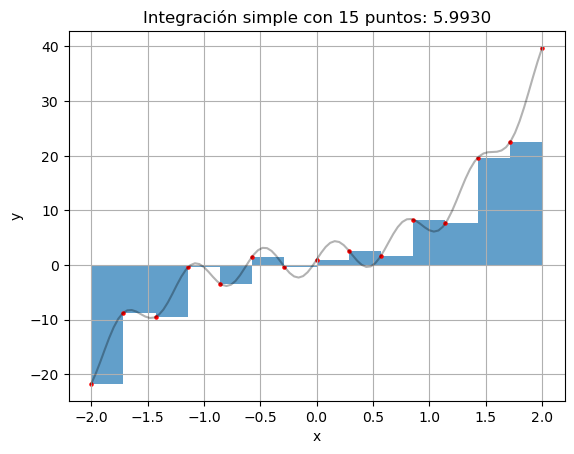

5.992985703457954

In [54]:
coeficientes = np.array([3, 2, 2, 1])

def funcion_muestra(x):
  return np.polyval(coeficientes, x) + max(coeficientes)*np.sin(10*x)

def integracion_simple(funcion,x):
  y = funcion(x)

  dif_x = x[1:] - x[:-1]
  integral = sum(y[:-1]*dif_x)

  x_plot = np.linspace(x[0], x[-1], 101)
  y_plot = funcion(x_plot)
  plt.plot(x_plot, y_plot, color="k",alpha=0.3)
  plt.fill_between(x, y,step='post', alpha=0.7)
  plt.scatter(x,y,color="r",s=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Integración simple con {len(x)} puntos: {integral:.4f}')
  plt.grid(True)
  plt.show()

  return integral

integracion_simple(funcion_muestra,np.linspace(-2, 2, 15) )

### Punto Medio

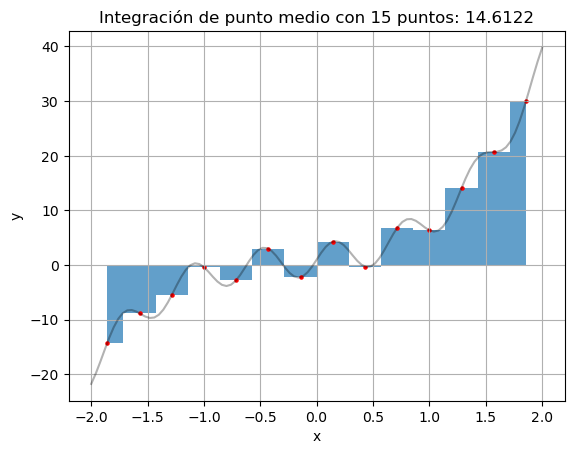

14.612244897959183

In [55]:
def integracion_medio(funcion,x):
  x_medio = (x[1:] + x[:-1])/2
  y_medio = funcion(x_medio)
  dif_x = x[1:] - x[:-1]
  integral = sum(y_medio*dif_x)

  x_plot = np.linspace(x[0], x[-1], 101)
  y_plot = funcion(x_plot)

  plt.plot(x_plot, y_plot, color="k",alpha=0.3)
  plt.fill_between(x_medio, y_medio,step='mid', alpha=0.7)
  plt.scatter(x_medio,y_medio,color="r",s=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Integración de punto medio con {len(x)} puntos: {integral:.4f}')
  plt.grid(True)
  plt.show()

  return integral

integracion_medio(funcion_muestra,np.linspace(-2, 2, 15) )

### Trapezoide

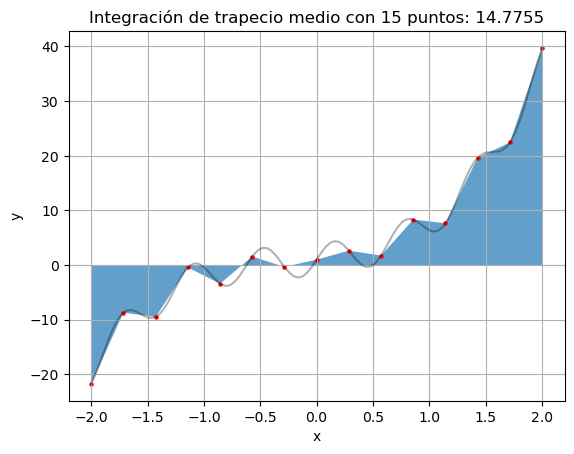

14.775510204081638

In [57]:
def integracion_trapecio(funcion,x):
  y = funcion(x)
  dif_x = x[1:] - x[:-1]
  trapecios = (y[1:] + y[:-1])/2
  integral = sum(trapecios*dif_x)

  x_plot = np.linspace(x[0], x[-1], 101)
  y_plot = funcion(x_plot)

  plt.plot(x_plot, y_plot, color="k",alpha=0.3)
  plt.fill_between(x, y, alpha=0.7)
  plt.scatter(x,y,color="r",s=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Integración de trapecio medio con {len(x)} puntos: {integral:.4f}')
  plt.grid(True)
  plt.show()

  return integral
integracion_trapecio(funcion_muestra,np.linspace(-2, 2, 15) )

### MonteCarlo

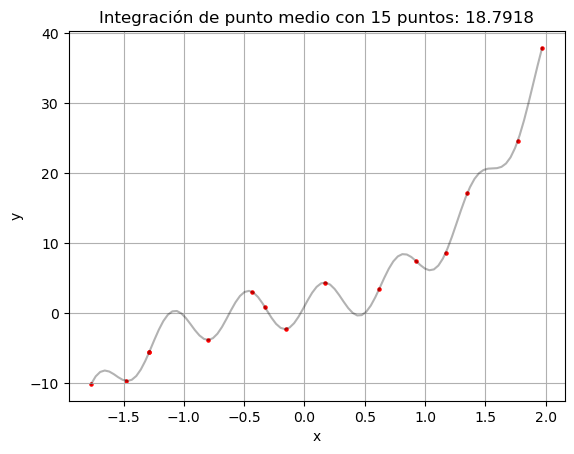

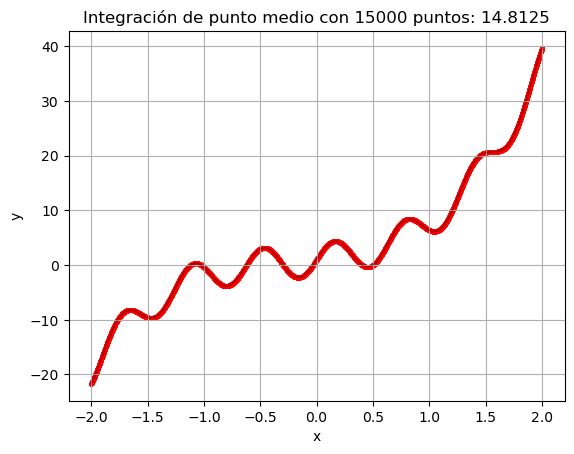

14.812471661850049

In [59]:
def integracion_montecarlo(funcion,a,b,n_puntos):
  x = np.random.uniform(a, b, size=n_puntos)
  y = funcion(x)
  integral = (b-a)*sum(y)/n_puntos

  x_plot = np.linspace(min(x), max(x), 101)
  y_plot = funcion(x_plot)

  plt.plot(x_plot, y_plot, color="k",alpha=0.3)
  #plt.fill_between(x, y, alpha=0.7)
  plt.scatter(x,y,color="r",s=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Integración de punto medio con {len(x)} puntos: {integral:.4f}')
  plt.grid(True)
  plt.show()

  return integral

integracion_montecarlo(funcion_muestra,-2, 2, 15 )
integracion_montecarlo(funcion_muestra,-2, 2, 15000 ) #150

### Simpson

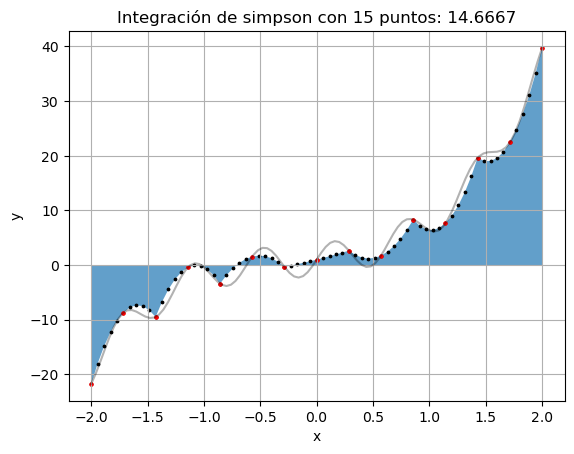

14.666666666666664

In [60]:
from scipy.interpolate import interp1d


def integracion_simpson(funcion,x):

  y = funcion(x)

  integral = 0
  x_int_tot = []
  y_int_tot = []
  for i in range(1,len(x),2): #SALTOS DE DOS EN DOS PARA TENER LOS ESPACIOS DE TRES PUNTOS A CURVEAR
    integral += (x[i+1]-x[i-1])*(y[i-1] + y[i+1] + 4*y[i])/6
    ## Visualización
    quadratic_interp = interp1d(x[i-1:i+2], y[i-1:i+2], kind='quadratic')
    x_int = np.linspace(x[i-1], x[i+1], 11)
    y_int = quadratic_interp(x_int)
    x_int_tot = np.concatenate((x_int_tot,x_int))
    y_int_tot = np.concatenate((y_int_tot,y_int))


  x_plot = np.linspace(min(x), max(x), 101)
  y_plot = funcion(x_plot)

  plt.plot(x_plot, y_plot, color="k",alpha=0.3)
  plt.fill_between(x_int_tot, y_int_tot, alpha=0.7)
  plt.scatter(x_int_tot, y_int_tot,color="k",s=3)
  plt.scatter(x,y,color="r",s=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Integración de simpson con {len(x)} puntos: {integral:.4f}')
  plt.grid(True)
  plt.show()

  return integral

integracion_simpson(funcion_muestra,np.linspace(-2, 2, 15) )

## Multiples dimensiones

In [61]:
def funcion_2d(x,y):
  return np.polyval(coeficientes, x) + max(coeficientes)*np.sin(10*y)

import plotly.graph_objects as go

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)

Z = funcion_2d(X, Y)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

fig.update_layout(
    title='Gráfico de ',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='f(x, y)'
    )
)

fig.show()

## Scipy

In [64]:
from  scipy.integrate import trapezoid, simpson, quad, dblquad


In [65]:
resultado = quad(funcion_muestra,-2,2)
resultado

(14.66666666666667, 3.6307542927972125e-13)

In [66]:
resultado = trapezoid(funcion_muestra(np.linspace(-2, 2, 15)), np.linspace(-2, 2, 15))
resultado

14.775510204081638

In [67]:
resultado = simpson(funcion_muestra(np.linspace(-2, 2, 15)), np.linspace(-2, 2, 15))
resultado

14.666666666666668

In [68]:
resultado = dblquad(
    funcion_2d,
    -2,2,
    -2,2,
)
resultado

(58.666666666666664, 6.513308411134251e-13)